In [1]:
import numpy as np
import cv2
import sys
import os
sys.path.insert(0, os.path.abspath('..'))

import salientregions as sr
import scipy.io as sio

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


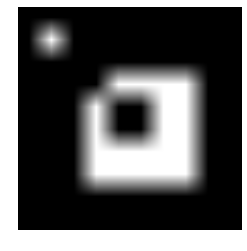

In [3]:
image = np.zeros((10,10), dtype='uint8')
image[3:8,3:8] = 255
image[3,3] = 0
image[4:6,4:6] = 0
image[1,1] = 255
sr.show_image(image)

In [4]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [5]:
filled_pre = image.copy()
_, contours, hierarchy = cv2.findContours(filled_pre,
                                  cv2.RETR_CCOMP,
                                  cv2.CHAIN_APPROX_SIMPLE)
for i, cnt in enumerate(contours):
    # Fill the original image for all the contours
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(filled_pre, [cnt], 0, 255, -1)

filled = cv2.bitwise_or(filled_pre, image)

In [6]:
filled_pre

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [7]:
filled

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [36]:
contour_image = image.copy()
_, contours, hierarchy = cv2.findContours(contour_image,
                                  cv2.RETR_CCOMP,
                                  #cv2.CHAIN_APPROX_SIMPLE
                                  cv2.CHAIN_APPROX_NONE)
contour_image = np.zeros_like(image)
for cnt in [contours[1]]:
    # Fill the original image for all the contours
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(contour_image, [cnt], 0, color=7, thickness=1, maxLevel=0)
contour_image

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 7, 7, 0, 0, 0, 0],
       [0, 0, 0, 7, 0, 0, 7, 0, 0, 0],
       [0, 0, 0, 7, 0, 0, 7, 0, 0, 0],
       [0, 0, 0, 0, 7, 7, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [37]:
contour_image = image.copy()
_, contours, hierarchy = cv2.findContours(contour_image,
                                  cv2.RETR_CCOMP,
                                  #cv2.CHAIN_APPROX_SIMPLE
                                  cv2.CHAIN_APPROX_NONE)
contour_image = np.zeros_like(image)
for cnt in [np.concatenate((contours[1], contours[0]))]:
    # Fill the original image for all the contours
        cv2.drawContours(contour_image, [cnt], 0, color=7, thickness=1)
contour_image

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 7, 7, 7, 7, 0, 0],
       [0, 0, 0, 7, 7, 0, 7, 7, 0, 0],
       [0, 0, 0, 7, 0, 0, 7, 7, 0, 0],
       [0, 0, 0, 7, 7, 7, 0, 7, 0, 0],
       [0, 0, 0, 7, 7, 7, 7, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [44]:
image2 = image.copy()
image2[3,3] = 255
image2

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [50]:
filled_pre2 = image2.copy()
_, contours2, hierarchy2 = cv2.findContours(filled_pre2,
                                  cv2.RETR_CCOMP,
                                  cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours2:
    # Fill the original image for all the contours
    cv2.drawContours(filled_pre, [cnt], 0, 255, -1)

filled2 = cv2.bitwise_or(filled_pre2, image2)

In [47]:
print([cnt.shape for cnt in contours])
print([cnt.shape for cnt in contours2])

[(5, 1, 2), (8, 1, 2), (1, 1, 2)]
[(4, 1, 2), (8, 1, 2), (1, 1, 2)]


In [51]:
print(hierarchy)
print(hierarchy2)
#next prev child parent

[[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [-1  0 -1 -1]]]
[[[ 2 -1  1 -1]
  [-1 -1 -1  0]
  [-1  0 -1 -1]]]


In [43]:
im_floodfill = image.copy()
h, w = image.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255, flags=8);
im_floodfill

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

In [44]:
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
im_out = image | im_floodfill_inv
im_out

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0, 255, 255, 255, 255, 255,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)